<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Task 2.

**1. For the "Median value of owner-occupied homes" provide a boxplot**


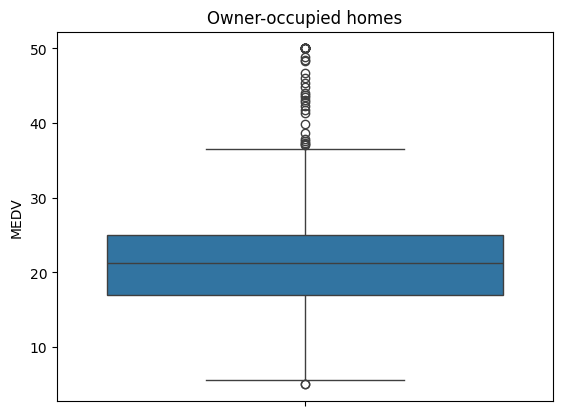

In [6]:
ax = sns.boxplot( y='MEDV', data=boston_df)
ax.set_title('Owner-occupied homes')
plt.show()

The Q1, Q2, Q3 are around 5, 22 and 35 respectively. There are many outliers appear for this variable

**2. Provide a  bar plot for the Charles river variable**


Text(0.5, 1.0, 'Number of homes near the Charles River')

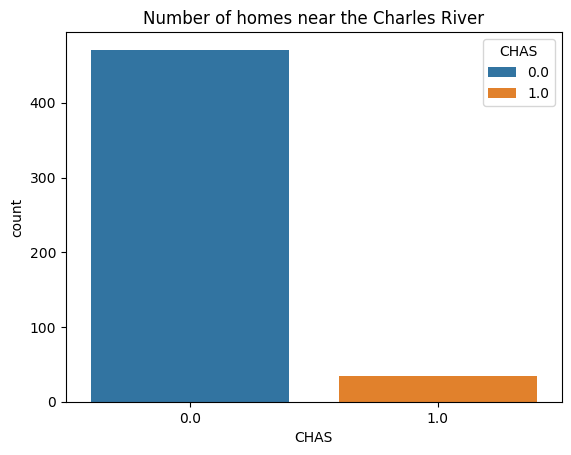

In [13]:
ax = sns.countplot(x="CHAS", hue="CHAS", data=boston_df)
ax.set_title('Number of homes near the Charles River')

The histogram shows that the majority of houses are not near the river


**3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)**


Text(0.5, 1.0, 'Median value of owner-occupied homes per Age Group')

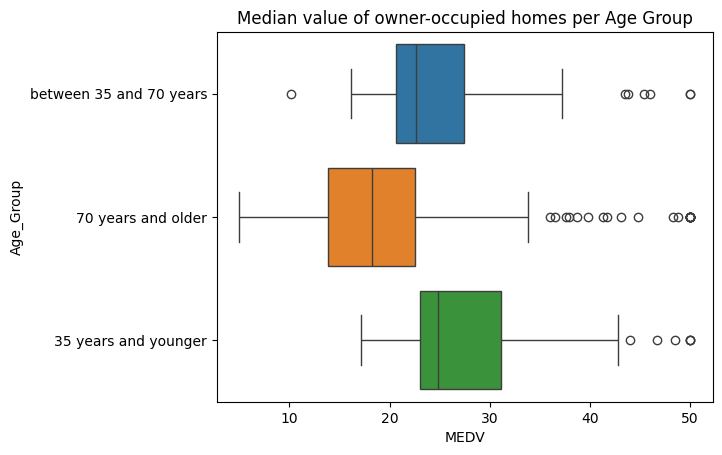

In [14]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 years and older'
ax1 = sns.boxplot(x = 'MEDV', y = 'Age_Group', data = boston_df, hue='Age_Group')
ax1.set_title('Median value of owner-occupied homes per Age Group')

The boxplot above shows that on the average, the median value of owner occupied homes is higher when the Age is lower

**4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?**


Text(0.5, 1.0, 'Nitric oxide concentration per proportion of non-retail business acres per town')

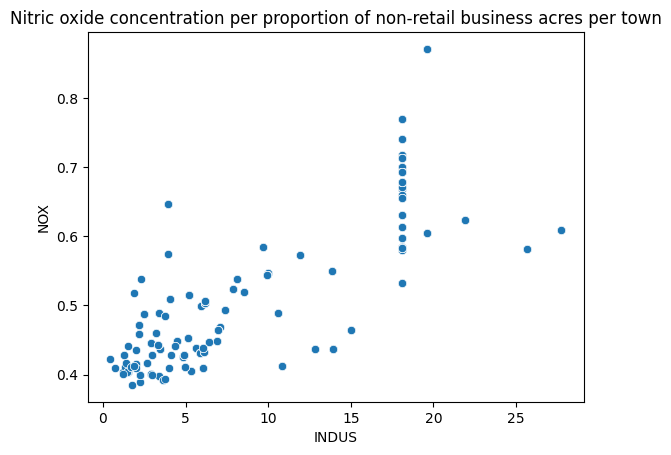

In [15]:
ax2 = sns.scatterplot(y = 'NOX', x = 'INDUS', data = boston_df)
ax2.set_title('Nitric oxide concentration per proportion of non-retail business acres per town')

The scatter plot's lower-left quadrant suggests a notable correlation between reduced levels of Nitric oxide and a smaller percentage of non-retail business space in each town.

In essence, an increased ratio of non-retail business space per town tends to result in elevated Nitric oxide levels.

**5.Create a histogram for the pupil to teacher ratio variable**


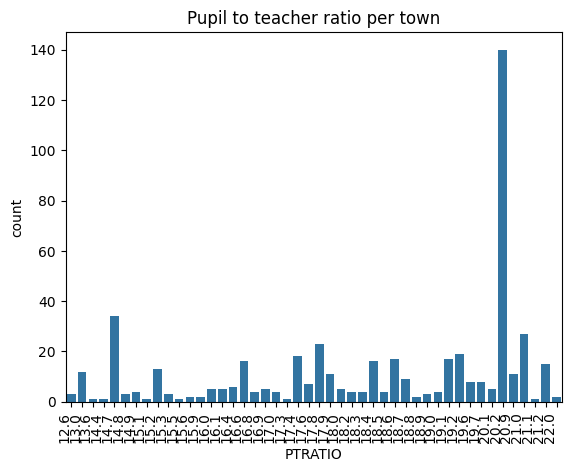

In [21]:
ax3 = sns.countplot(x='PTRATIO', data=boston_df)
ax3.set_title('Pupil to teacher ratio per town')
plt.xticks(rotation=90, ha='right')
plt.show()

The most popular pupil to teacher ratio per town is 20.9

#### Task 3. For each of the following questions;

1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

**1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**


In [22]:
boston_df.loc[(boston_df['CHAS'] == 0), 'CHAS_1'] = 'FAR'
boston_df.loc[(boston_df['CHAS'] == 1), 'CHAS_1'] = 'NEAR'
boston_df.head(10)

scipy.stats.ttest_ind(boston_df[boston_df['CHAS_1'] == 'FAR']['MEDV'], 
                      boston_df[boston_df['CHAS_1'] == 'NEAR']['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

#### Note
Hypothesis test:

Ho: There's no significant difference in median value between houses bounded and not bounded by the Charles River

Ha: There's a significant difference in median value between houses bounded and not bounded by the Charles River

Conclusion:Given the p-value is less than 0.05, we reject the Ho, meaning there is not a statistical difference in median value betwenn houses near the Charles River and houses far away

**2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

Hypothesis test
Ho: There isn't statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

Ha: There is statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

In [12]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table = sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


Conclusion: Given p-value is less than 0.05, we reject => There is statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

**3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres pertown? (Pearson Correlation)**

Hypothesis test
Ho: Nitric Oxide concentration is not correlated with the proportion of non-retail business acres per town

Ha: Nitric Oxide concentration is correlated with the proportion of non-retail business acres per town


In [13]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Conclusion: Given the Pearson Coefficient is 0.76365 and p-value less than 0.05, we reject Ho => there is a positive correlation between Nitric oxide concentration and proportion of non-retail business acres per town

**4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**


In [14]:
x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predisction = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 30 May 2024   Prob (F-statistic):           1.21e-08
Time:                        17:41:44   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion:
The coef DIS of 1.0916 and there is a significance (Pvalue<0.005) that indicates that an additional weighted distance to the 5 empolyment centers in boston increases of 1.0916 the median value of owner occupied homes